In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print('pandas version', pd.__version__)
print('numpy version', np.__version__)
print('seaborn version', sns.__version__)
import warnings
warnings.filterwarnings('ignore')

pandas version 2.0.3
numpy version 1.24.3
seaborn version 0.12.2


In [3]:
df = pd.read_csv('IMDb Movies India.csv')

In [4]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_edit = df.copy()

df_edit.dropna(subset= ['Name', 'Rating', 'Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis = 0, inplace = True)
df_edit.reset_index(drop = True, inplace = True)

df_edit

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
5654,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
5655,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
5656,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5657,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [6]:

df_edit['Name'] = df_edit['Name'].str.extract('([A-Za-z\s\'\-]+)')

df_edit['Genre'] = df_edit['Genre'].str.split(', ')
df_edit = df_edit.explode('Genre')
df_edit['Genre'].fillna(df_edit['Genre'].mode()[0], inplace=True)


In [7]:
df_edit

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Gadhvi,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,Yaaram,(2019),110 min,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
1,Yaaram,(2019),110 min,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,Aur Pyaar Ho Gaya,(1997),147 min,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
2,Aur Pyaar Ho Gaya,(1997),147 min,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
5656,Zulm Ki Zanjeer,(1989),125 min,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5657,Zulmi,(1999),129 min,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
5657,Zulmi,(1999),129 min,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
5658,Zulm-O-Sitam,(1998),130 min,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [8]:
df_edit['Year'] = df_edit['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [9]:
df_edit['Duration'] = df_edit['Duration'].str.rstrip(' min').astype(float)

In [10]:
df_edit['Votes'] = df_edit['Votes'].astype(float)

In [11]:
df_edit['Rating'] = df_edit['Rating'].astype(float)

In [12]:
df_edit['Actor 1'] = df_edit['Actor 1'].str.strip().str.lower()
df_edit['Actor 2'] = df_edit['Actor 2'].str.strip().str.lower()
df_edit['Actor 3'] = df_edit['Actor 3'].str.strip().str.lower()

In [13]:
df_edit = df_edit.drop_duplicates(subset = ['Name'], keep = False )
df_edit.reset_index(drop = True, inplace=True)

In [14]:
df_edit['Genre_mean_rating'] = df_edit.groupby('Genre')['Rating'].transform('mean')

In [15]:
df_edit

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating
0,Gadhvi,2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,rasika dugal,vivek ghamande,arvind jangid,6.422876
1,An Ode to Lost Love,2004,96.0,Drama,6.2,17.0,Madhu Ambat,rati agnihotri,gulshan grover,atul kulkarni,6.422876
2,Ek Tera Saath,2016,120.0,Horror,5.9,59.0,Arshad Siddiqui,pankaj berry,anubhav dhir,hritu dudani,4.698529
3,Park Avenue,2005,116.0,Drama,7.1,1002.0,Aparna Sen,shabana azmi,konkona sen sharma,rahul bose,6.422876
4,th August,1993,168.0,Drama,5.6,15.0,Vicky Ranawat,ronit roy,tisca chopra,shakti kapoor,6.422876
...,...,...,...,...,...,...,...,...,...,...,...
1500,Zindagi Tere Naam,2012,120.0,Romance,4.4,33.0,Ashu Trikha,mithun chakraborty,ranjeeta kaur,priyanka mehta,5.535593
1501,Zindagi Tumse,2019,120.0,Family,6.0,13.0,Tariq Bhat,sadhana singh,guddi maruti,rajesh puri,6.407143
1502,Zindagi Zindabad,2000,140.0,Drama,5.7,7.0,Sumitra Bhave,sunil sukthankar,mita vashisht,milind gunaji,6.422876
1503,Zoo,2018,100.0,Drama,5.7,78.0,Shlok Sharma,shashank arora,prince daniel,shatakshi gupta,6.422876


In [16]:
def find_unique_actors(dataset):
    actors_concatenated = pd.concat([dataset['Actor 1'], dataset['Actor 2'], dataset['Actor 3']], ignore_index=True)
    
    actors = pd.DataFrame({'Actor' : actors_concatenated})
    actors.drop_duplicates(inplace=True)
    actors.reset_index(drop = True, inplace = True)

    return actors
unique_actors = find_unique_actors(df_edit)

In [17]:
actor_dict = {}
for i, actor in enumerate(unique_actors['Actor']):
    actor_dict[actor] = i+1
    
df_edit['Actor 1'] = df_edit['Actor 1'].map(actor_dict)
df_edit['Actor 2'] = df_edit['Actor 2'].map(actor_dict)
df_edit['Actor 3'] = df_edit['Actor 3'].map(actor_dict)


In [18]:
df_edit

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating
0,Gadhvi,2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,1,999,1864,6.422876
1,An Ode to Lost Love,2004,96.0,Drama,6.2,17.0,Madhu Ambat,2,1000,606,6.422876
2,Ek Tera Saath,2016,120.0,Horror,5.9,59.0,Arshad Siddiqui,3,1001,1865,4.698529
3,Park Avenue,2005,116.0,Drama,7.1,1002.0,Aparna Sen,4,99,354,6.422876
4,th August,1993,168.0,Drama,5.6,15.0,Vicky Ranawat,5,1002,582,6.422876
...,...,...,...,...,...,...,...,...,...,...,...
1500,Zindagi Tere Naam,2012,120.0,Romance,4.4,33.0,Ashu Trikha,56,1218,2610,5.535593
1501,Zindagi Tumse,2019,120.0,Family,6.0,13.0,Tariq Bhat,995,1861,2611,6.407143
1502,Zindagi Zindabad,2000,140.0,Drama,5.7,7.0,Sumitra Bhave,996,851,1217,6.422876
1503,Zoo,2018,100.0,Drama,5.7,78.0,Shlok Sharma,997,1862,2612,6.422876


In [19]:
# def split_genre(dataset):
#     for index, row in dataset.iterrows():
#         genres = row['Genre'].split(', ')
#         for i, genre in enumerate(genres):
#             dataset.at[index, f'Genre {i+1}'] = genre

# split_genre(df_test)


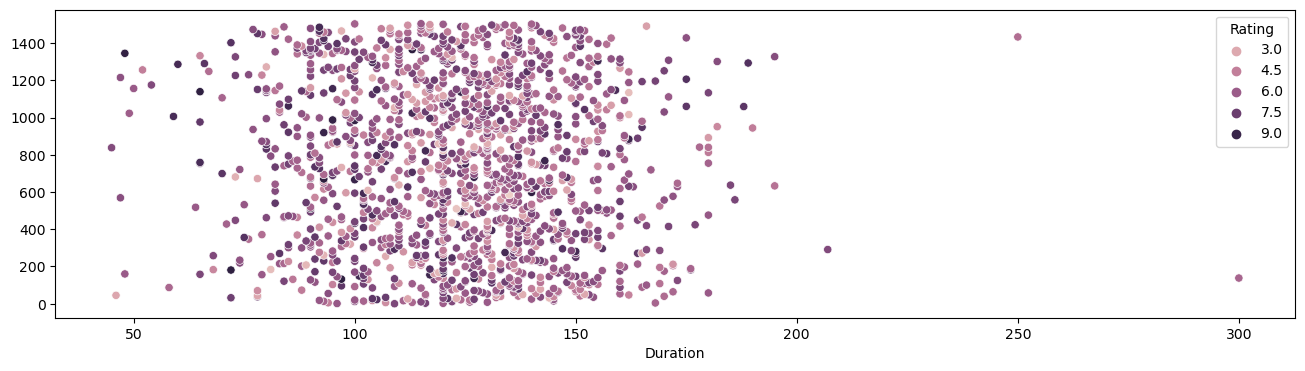

In [20]:
plt.figure(figsize = (16,4))

sns.scatterplot(data = df_edit , x = df_edit['Duration'], y = df_edit.index, hue = df_edit['Rating'])

plt.show()

In [21]:
df_edit.describe()

,Year,Duration,Rating,Votes,Actor 1,Actor 2,Actor 3,Genre_mean_rating
count,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000
mean,1998.629236,123.502326,5.971163,560.668439,404.614618,1033.058472,1547.889701,5.971163
std,20.478860,24.999338,1.418131,4343.960910,292.225285,574.886605,846.566797,0.623314
min,1931.000000,45.000000,1.600000,5.000000,1.000000,2.000000,1.000000,4.333333
25%,1986.000000,107.000000,5.000000,15.000000,138.000000,503.000000,701.000000,5.535593
50%,2005.000000,125.000000,6.100000,35.000000,356.000000,1184.000000,1920.000000,6.422876
75%,2016.000000,140.000000,7.000000,131.000000,640.000000,1499.000000,2248.000000,6.422876
max,2021.000000,300.000000,9.400000,101014.000000,998.000000,1863.000000,2613.000000,7.760000


In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


# df_edit['Director'] = label_encoder.fit_transform(df_edit['Director'])
# df_edit['Genre'] = label_encoder.fit_transform(df_edit['Genre'])

# # director_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# # genre_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# # this is a list of the data used to encode the Director feature of the dataset


# dictionary to store mappings
encoded_mappings = {}

columns_to_encode = ['Genre', 'Director']

for column in columns_to_encode:
    # Fit and transform the column to numerical values
    df_edit[column] = label_encoder.fit_transform(df_edit[column])
    
    unique_labels = label_encoder.classes_
    
    # Create a dictionary to map numerical values to labels
    mapping = {i: label for i, label in enumerate(unique_labels)}
    
    # Add the mapping to the dictionary of mappings
    encoded_mappings[column] = mapping

# Now encoded_mappings contains a dictionary for each encoded column
# print(encoded_mappings) # This will print out a large set of mapped values, so dont activate it unless you want to visualise them at whole.

# Prediction model

In [34]:

X = df_edit[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director','Actor 1', 'Actor 2', 'Actor 3']]
y = df_edit['Rating']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

In [37]:
X_train

,Year,Votes,Duration,Genre_mean_rating,Director,Actor 1,Actor 2,Actor 3
799,2012,3677.0,100.0,5.535593,95,576,1468,2261
1351,2020,10.0,102.0,6.422876,265,898,1775,2526
1243,1999,56.0,125.0,5.030986,1018,78,56,1151
1116,1936,10.0,138.0,5.392308,455,254,1651,343
1101,1983,12.0,118.0,6.407143,880,134,1643,2411
...,...,...,...,...,...,...,...,...
1130,2015,71.0,139.0,5.535593,310,775,1655,2417
1294,1990,1255.0,160.0,6.422876,225,48,30,2497
860,2003,2042.0,99.0,6.422876,519,612,1500,2291
1459,2020,122.0,93.0,6.422876,696,968,409,2593


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [57]:
linear_regression = LinearRegression()
Rnd_forest_reg = RandomForestRegressor() # Defining our model
# Rnd_forest_classifier = RandomForestClassifier()

In [58]:
linear_regression_fit = linear_regression.fit(X_train, Y_train)
linear_regression_pred = linear_regression.predict(X_test)

Rnd_forest_reg_fit = Rnd_forest_reg.fit(X_train, Y_train)
Rnd_forest_reg_pred = Rnd_forest_reg.predict(X_test)

# Rnd_forest_classifier_fit =Rnd_forest_classifier.fit(X_train, Y_train)
# Rnd_forest_classifier_pred = Rnd_forest_classifier.predict(X_test)

In [59]:
from sklearn.metrics import r2_score

In [60]:
print('R2 score: ',r2_score(Y_test, linear_regression_pred))
print('R2 score: ', r2_score(Y_test, Rnd_forest_reg_pred))

R2 score:  0.271058909401126
R2 score:  0.3212372618572228
